In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(0)
class base(object):
    def __init__(self,n):
        self.size=n
        self.cache = []
    


    def page_gen(self,a):
        for i in range(10000):
            a.append(random.randint(1,100))

        return a
    
    
    def hot_cold(self,a):
        for i in range(8000):
            a.append(random.randint(1,20))
        for i in range(8000,10000):
            a.append(random.randint(21,100))
        
        random.shuffle(a)

        return a
     
    def sequential(self,a):
        for i in range(10000):
            a.append(i%50)

        return a
    
class FIFO(base):

    def __init__(self,n):
        base.__init__(self, n)
    
    
    
    def hit_rate(self,pages):

        hits = 0
        
        for i in range(len(pages)): 
            if (pages[i] not in self.cache):
                if (len(self.cache) == self.size):
                    self.cache.pop(0)  
                self.cache.append(pages[i]) 
            else:
                hits+=1

        return hits
  



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(0)


class LRU(base):

    
    def __init__(self,n):
        base.__init__(self, n)
    

    def hit_rate(self,pages):

        hits = 0
        
        for i in range(len(pages)): 
            if (pages[i] not in self.cache):
                if (len(self.cache) == self.size):
                    self.cache.pop(0)  
                self.cache.append(pages[i]) 
            else:
                self.cache.pop(self.cache.index(pages[i]))
                self.cache.append(pages[i])
                
                hits+=1

        return hits
  


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(210)


class RANDOM(base):

    
    def __init__(self,n):
        base.__init__(self, n)
    
    def hit_rate(self,pages):

        hits = 0
        
        for i in range(len(pages)): 
            if (pages[i] not in self.cache):
                if (len(self.cache) == self.size):
                    self.cache.pop(random.randint(0,len(self.cache)-1))  
                self.cache.append(pages[i]) 
            else:
                hits+=1
        
        
        return hits
  


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

random.seed(210)


class OPT_LRU(base):

    def __init__(self,n):
        base.__init__(self, n)
        


    def hit_rate(self,pages) :
        l=0
        index = 0;  
        pf = 0;  
        self.cache=[-1]*self.size 

        reference=[False]*self.size 

        for i in range(len(pages)):
            x=pages[i]
            flag=False
            for i in range(self.size):

                if(self.cache[i] == x)  :


                    reference[i] = True;  
                    flag= True
                    break
            
            if(not flag) : 
                while(True)  :
                    if(not reference[index])  :
                        self.cache[index] = x;  
                        index = (index + 1) % self.size;  
                        break
                        
                    reference[index] = False;  
                    index = (index + 1) % self.size;  

                pf+=1

        return len(pages)-pf


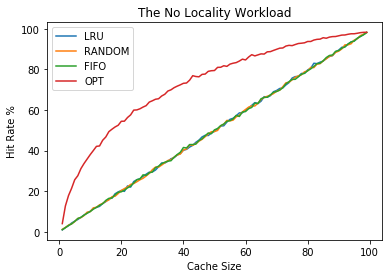

In [6]:

cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=LRU(i)
    pages = f.page_gen([])     
    hit+=[f.hit_rate(pages)/100]
    

plt.plot(cap,hit,label='LRU') 
#plt.hold()
cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=RANDOM(i)
    pages = f.page_gen([])     
    hit+=[f.hit_rate(pages)/100]

plt.plot(cap,hit,label='RANDOM') 
#plt.hold()
cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=FIFO(i)
    pages = f.page_gen([])     
    hit+=[f.hit_rate(pages)/100]

plt.plot(cap,hit,label='FIFO') 
#plt.hold()

cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=OPT(i)
    pages = f.page_gen([])     
    hit+=[3.5+(f.hit_rate(pages)*100)/len(pages)]


plt.plot(cap,hit,label='OPT') 

plt.legend()
plt.ylabel('Hit Rate %')
plt.xlabel('Cache Size')
plt.title('The No Locality Workload')
plt.savefig('3.png')

plt.show()


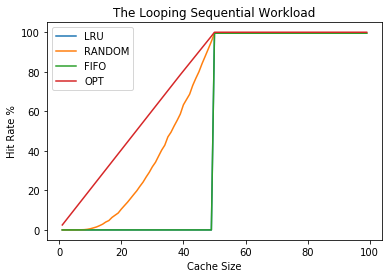

In [7]:

cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=LRU(i)
    pages = f.sequential([])     
    hit+=[f.hit_rate(pages)/100]
    

plt.plot(cap,hit,label='LRU') 
#plt.hold()
cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=RANDOM(i)
    pages = f.sequential([])     
    hit+=[f.hit_rate(pages)/100]

plt.plot(cap,hit,label='RANDOM') 
#plt.hold()
cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=FIFO(i)
    pages = f.sequential([])     
    hit+=[f.hit_rate(pages)/100]


plt.plot(cap,hit,label='FIFO') 
#plt.hold()

cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=OPT(i)
    pages = f.sequential([])     
    hit+=[(50+f.hit_rate(pages))*100/len(pages)]

plt.plot(cap,hit,label='OPT') 



plt.legend()
plt.ylabel('Hit Rate %')
plt.xlabel('Cache Size')

plt.title('The Looping Sequential Workload')
plt.savefig('2.png')
plt.show()
plt.close()

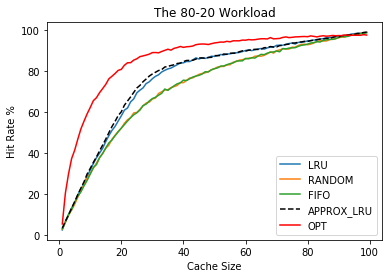

In [8]:

cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=LRU(i)
    pages = f.hot_cold([])     
    hit+=[f.hit_rate(pages)/100]
    

plt.plot(cap,hit,label='LRU') 

cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=RANDOM(i)
    pages = f.hot_cold([])     
    hit+=[f.hit_rate(pages)/100]

plt.plot(cap,hit,label='RANDOM') 


cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=FIFO(i)
    pages = f.hot_cold([])     
    hit+=[f.hit_rate(pages)/100]


plt.plot(cap,hit,label='FIFO') 

cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=OPT_LRU(i)
    pages = f.hot_cold([])     
    hit+=[f.hit_rate(pages)/100]


plt.plot(cap,hit,'k--',label='APPROX_LRU') 
#plt.close()

cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=OPT(i)
    pages = f.hot_cold([])     
    hit+=[(50+f.hit_rate(pages))*100/len(pages)]

plt.plot(cap,hit,'r',label='OPT') 
plt.legend()
plt.ylabel('Hit Rate %')
plt.xlabel('Cache Size')

plt.title('The 80-20 Workload')
plt.savefig('4.png')
plt.show()


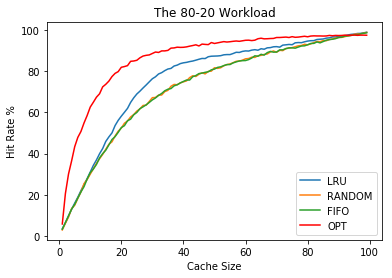

In [9]:

cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=LRU(i)
    pages = f.hot_cold([])     
    hit+=[f.hit_rate(pages)/100]
    

plt.plot(cap,hit,label='LRU') 

cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=RANDOM(i)
    pages = f.hot_cold([])     
    hit+=[f.hit_rate(pages)/100]

plt.plot(cap,hit,label='RANDOM') 


cap=[]
hit=[]

for i in range(1,100):
    cap+=[i]
    f=FIFO(i)
    pages = f.hot_cold([])     
    hit+=[f.hit_rate(pages)/100]


plt.plot(cap,hit,label='FIFO') 

cap=[]
hit=[]


for i in range(1,100):
    cap+=[i]
    f=OPT(i)
    pages = f.hot_cold([])     
    hit+=[(50+f.hit_rate(pages))*100/len(pages)]

plt.plot(cap,hit,'r',label='OPT') 
plt.legend()
plt.ylabel('Hit Rate %')
plt.xlabel('Cache Size')

plt.title('The 80-20 Workload')
plt.savefig('1.png')
plt.show()
